## Star Wars Survey Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Reading in the data and looking at a preview. 

In [3]:
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


Removing the junk rows.

In [4]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

We want to convert the two columns below to contain only boolean values (True,False,NaN). 

In [5]:
haveyouseen=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]

areyouafan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]

yesnomap = {"Yes":True,"No":False}

In [ ]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]  = haveyouseen.map(yesnomap)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = areyouafan.map(yesnomap)

Columns 3:9 represent yes or no answers for if the respondent had seen each Star Wars movie. For each column, if value of a cell is the title of the movie, it means the respondent has seen the movie. If the value is NaN, the respondent either did not answer or did not see it. We need to convert all of these columns to have boolean values. First, we will rename the columns.

In [11]:
oldcolnames = star_wars.columns[3:9].tolist()

print(oldcolnames)
renamecolsdic={}

    
for i,k in enumerate(oldcolnames):
    renamecolsdic[oldcolnames[i]] = "seen_{}".format(i+1)
    
print(renamecolsdic)




['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
{'seen_6': 'seen_6', 'seen_4': 'seen_4', 'seen_5': 'seen_5', 'seen_2': 'seen_2', 'seen_3': 'seen_3', 'seen_1': 'seen_1'}


Using the new column names with the original dataframe. 

In [9]:
star_wars = star_wars.rename(columns=renamecolsdic)

In [10]:
print(star_wars.head(2))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      
2                                                NaN                      

                                     seen_1  \
1  Star Wars: Episode I  The Phantom Menace   
2                                       NaN   

                                        seen_2  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   

                                        seen_3  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   

                              seen_4  \
1  Star Wars: Episode IV  A New Hope   
2        

In [12]:
yesnoSW1 = {"Star Wars: Episode I  The Phantom Menace":True, np.NaN:False}
yesnoSW2 = {"Star Wars: Episode II  Attack of the Clones":True, np.NaN:False}
yesnoSW3 = {"Star Wars: Episode III  Revenge of the Sith":True, np.NaN:False}
yesnoSW4 = {"Star Wars: Episode IV  A New Hope":True, np.NaN:False}
yesnoSW5 = {"Star Wars: Episode V The Empire Strikes Back":True, np.NaN:False}
yesnoSW6 = {"Star Wars: Episode VI Return of the Jedi":True, np.NaN:False}

Using these dictionaries to convert to boolean values.

In [14]:
star_wars["seen_1"] = star_wars["seen_1"].map(yesnoSW1)
star_wars["seen_2"] = star_wars["seen_2"].map(yesnoSW2)
star_wars["seen_3"] = star_wars["seen_3"].map(yesnoSW3)
star_wars["seen_4"] = star_wars["seen_4"].map(yesnoSW4)
star_wars["seen_5"] = star_wars["seen_5"].map(yesnoSW5)
star_wars["seen_6"] = star_wars["seen_6"].map(yesnoSW6)


Columns 9:15 have the respondent rank the Star Wars movies according to their favorites, with 1 being their most favorite and 6 being their least. Each column represents the ranking given to that film. All we need to do here is rename the columns and convert them to float data type. 

In [17]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rankcols=star_wars.columns[9:15].tolist()
rankcolsdic = {}

for i,k in enumerate(rankcols):
    rankcolsdic[rankcols[i]] = "ranking_{}".format(i+1)
    

    

    
star_wars = star_wars.rename(columns=rankcolsdic)

In [18]:
print(star_wars[star_wars.columns[9:15]].head(5))

   ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1        3.0        2.0        1.0        4.0        5.0        6.0
2        NaN        NaN        NaN        NaN        NaN        NaN
3        1.0        2.0        3.0        4.0        5.0        6.0
4        5.0        6.0        1.0        2.0        4.0        3.0
5        5.0        4.0        6.0        2.0        1.0        3.0


We can now compute the mean rankings and display them in a bar plot. Remember, lower values are better. It looks like the fifth film, The Empire Strikes Back, finishes at the top. All three of the old trilogy are more popular than any of the new trilogy films.

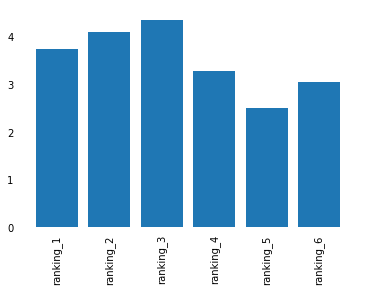

In [48]:
fig,ax = plt.subplots()

ax.bar(star_wars.columns[9:15],star_wars[star_wars.columns[9:15]].mean())

ax.set_xticklabels(star_wars.columns[9:15],rotation=90)


ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

We can also look at how many people have seen each film. Despite the older trilogy being noticeably more popular, we see that more respondents have new the newwer films.

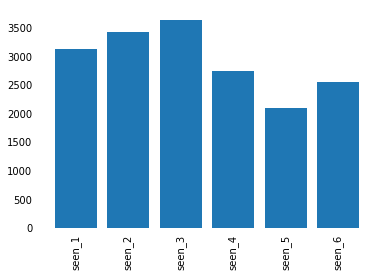

In [49]:
fig,ax = plt.subplots()

ax.bar(star_wars.columns[3:9],star_wars[star_wars.columns[9:15]].sum())

ax.set_xticklabels(star_wars.columns[3:9],rotation=90)



ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

Does gender change the results?

In [20]:
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"]=="Female"]



Look at the results for men only below. Men, as a whole, like The Empire Strikes Back the most, and are indifferent between the new trilogy films

Text(0.5,1,u'Star Wars Rankings According to Men')

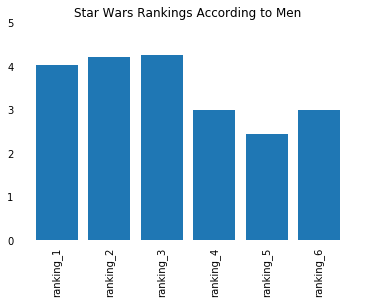

In [22]:
fig,ax = plt.subplots()

ax.bar(males.columns[9:15],males[males.columns[9:15]].mean())

ax.set_xticklabels(males.columns[9:15],rotation=90)
ax.set_ylim(0,5)


ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Star Wars Rankings According to Men")

Now we look at the results for women. We see a lot of the same features, although women seem to prefer the first new trilogy movies, The Phantom Menace, to the third new trilogy film, The Revenge of the Sith. As a whole, it seems women also prefer the third film in the original trilogy, The Return of the Jedi, to the original film, A New Hope. 

Text(0.5,1,u'Star Wars Rankings According to Women')

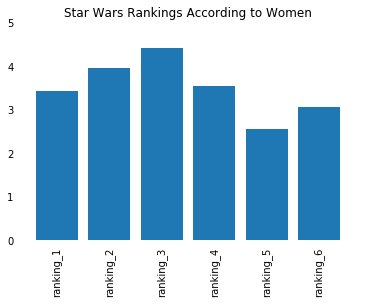

In [24]:
fig,ax = plt.subplots()

ax.bar(females.columns[9:15],females[females.columns[9:15]].mean())

ax.set_xticklabels(females.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Star Wars Rankings According to Women")

One of the perpetual battles in geekdom is between Star Trek and Star Wars fandoms. In general, Star Trek is considered science Fction, focussing on scientific and moral problems, while Star Wars is science fantasy, dealing mostly with action and adventure. Does your fandom influence what you think of the Star Wars movies? This survey has information on that! We convert the relevant column to have boolean values. 

In [26]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]= star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].map(yesnomap)



In [27]:
pd.value_counts(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].values)


False    641
True     427
dtype: int64

In [28]:
star_trek_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True]
star_trek_nonfan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == False]


Below we look at the opinions of Star Trek fans. We see that they show a very strong preference for the original trilogy. We note that they prefer the 6th film, The Return of the Jedi over A New Hope. 

Text(0.5,1,u'Rankings by Star Trek Fans')

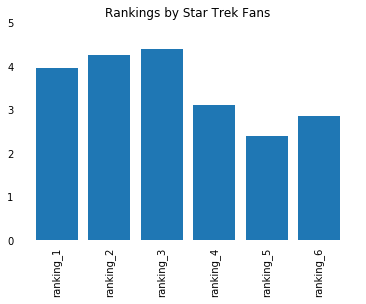

In [29]:
fig,ax = plt.subplots()

ax.bar(star_trek_fan.columns[9:15],star_trek_fan[star_trek_fan.columns[9:15]].mean())

ax.set_xticklabels(star_trek_fan.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Rankings by Star Trek Fans")

The general pattern is the same, although we see more difference of opinion about the new trilogy films. 

Text(0.5,1,'Rankings by Star Trek Haters')

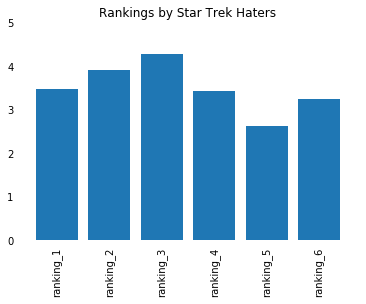

In [69]:
fig,ax = plt.subplots()

ax.bar(star_trek_nonfan.columns[9:15],star_trek_nonfan[star_trek_nonfan.columns[9:15]].mean())

ax.set_xticklabels(star_trek_nonfan.columns[9:15],rotation=90)
ax.set_ylim(0,5)

ax.tick_params(bottom='off', left='off', right='off', top='off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_title("Rankings by Star Trek Haters")